In [1]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In [2]:
input_csv = "../results-yasmin/openssl-final.csv"
baseline = "x86_64,qemu,qemu"
base_arch, base_runtime, base_tag = baseline.split(',')
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,aarch64,openssl.md5-16,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,B/s,4.503507e+07,native,native
1,aarch64,openssl.md5-64,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,B/s,9.773562e+07,native,native
2,aarch64,openssl.md5-256,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,B/s,1.676512e+08,native,native
3,aarch64,openssl.md5-1024,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,B/s,2.059578e+08,native,native
4,aarch64,openssl.md5-8192,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,B/s,2.219183e+08,native,native
...,...,...,...,...,...,...,...,...,...,...
340,x86_64,openssl.rsa1024-verify,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,verify/s,6.525055e+04,qemu,risotto
341,x86_64,openssl.rsa2048-sign,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,sign/s,4.726727e+02,qemu,risotto
342,x86_64,openssl.rsa2048-verify,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,verify/s,1.942084e+04,qemu,risotto
343,x86_64,openssl.rsa4096-sign,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,sign/s,7.280000e+01,qemu,risotto


In [3]:
base_df = df.loc[df['tag'] == 'qemu']
base_df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
75,x86_64,openssl.md5-16,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.746276e+07,qemu,qemu
76,x86_64,openssl.md5-64,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,5.178587e+07,qemu,qemu
77,x86_64,openssl.md5-256,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.140630e+08,qemu,qemu
78,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.692863e+08,qemu,qemu
79,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.977003e+08,qemu,qemu
...,...,...,...,...,...,...,...,...,...,...
300,x86_64,openssl.rsa1024-verify,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,verify/s,7.433934e+03,qemu,qemu
301,x86_64,openssl.rsa2048-sign,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,sign/s,6.790000e+01,qemu,qemu
302,x86_64,openssl.rsa2048-verify,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,verify/s,2.664865e+03,qemu,qemu
303,x86_64,openssl.rsa4096-sign,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,sign/s,1.096710e+01,qemu,qemu


In [4]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()

In [5]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,qemu,native,risotto
0,openssl.md5-1024,1.581219e+08,2.168398e+08,2.156623e+08
1,openssl.md5-16,1.658788e+07,4.209254e+07,4.499937e+07
2,openssl.md5-256,1.072775e+08,1.722048e+08,1.688918e+08
3,openssl.md5-64,4.818675e+07,9.532325e+07,9.214773e+07
4,openssl.md5-8192,1.843187e+08,2.390591e+08,2.414837e+08
5,openssl.rsa1024-sign,4.527947e+02,2.964844e+03,2.953614e+03
6,openssl.rsa1024-verify,7.429325e+03,6.564845e+04,6.522416e+04
7,openssl.rsa2048-sign,6.782713e+01,4.730531e+02,4.725325e+02
8,openssl.rsa2048-verify,2.702407e+03,1.941161e+04,1.937184e+04
9,openssl.rsa4096-sign,1.092283e+01,7.284913e+01,7.284000e+01


In [6]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,aarch64,openssl.md5-16,none,1.0,B/s,4.503507e+07,native,native,2.714939,native,0.0
1,aarch64,openssl.md5-64,none,1.0,B/s,9.773562e+07,native,native,2.028268,native,0.0
2,aarch64,openssl.md5-256,none,1.0,B/s,1.676512e+08,native,native,1.562780,native,0.0
3,aarch64,openssl.md5-1024,none,1.0,B/s,2.059578e+08,native,native,1.302526,native,0.0
4,aarch64,openssl.md5-8192,none,1.0,B/s,2.219183e+08,native,native,1.203992,native,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225,x86_64,openssl.rsa1024-verify,none,1.0,verify/s,6.525055e+04,qemu,risotto,8.782837,risotto,0.0
226,x86_64,openssl.rsa2048-sign,none,1.0,sign/s,4.726727e+02,qemu,risotto,6.968784,risotto,0.0
227,x86_64,openssl.rsa2048-verify,none,1.0,verify/s,1.942084e+04,qemu,risotto,7.186498,risotto,0.0
228,x86_64,openssl.rsa4096-sign,none,1.0,sign/s,7.280000e+01,qemu,risotto,6.664941,risotto,0.0


In [7]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

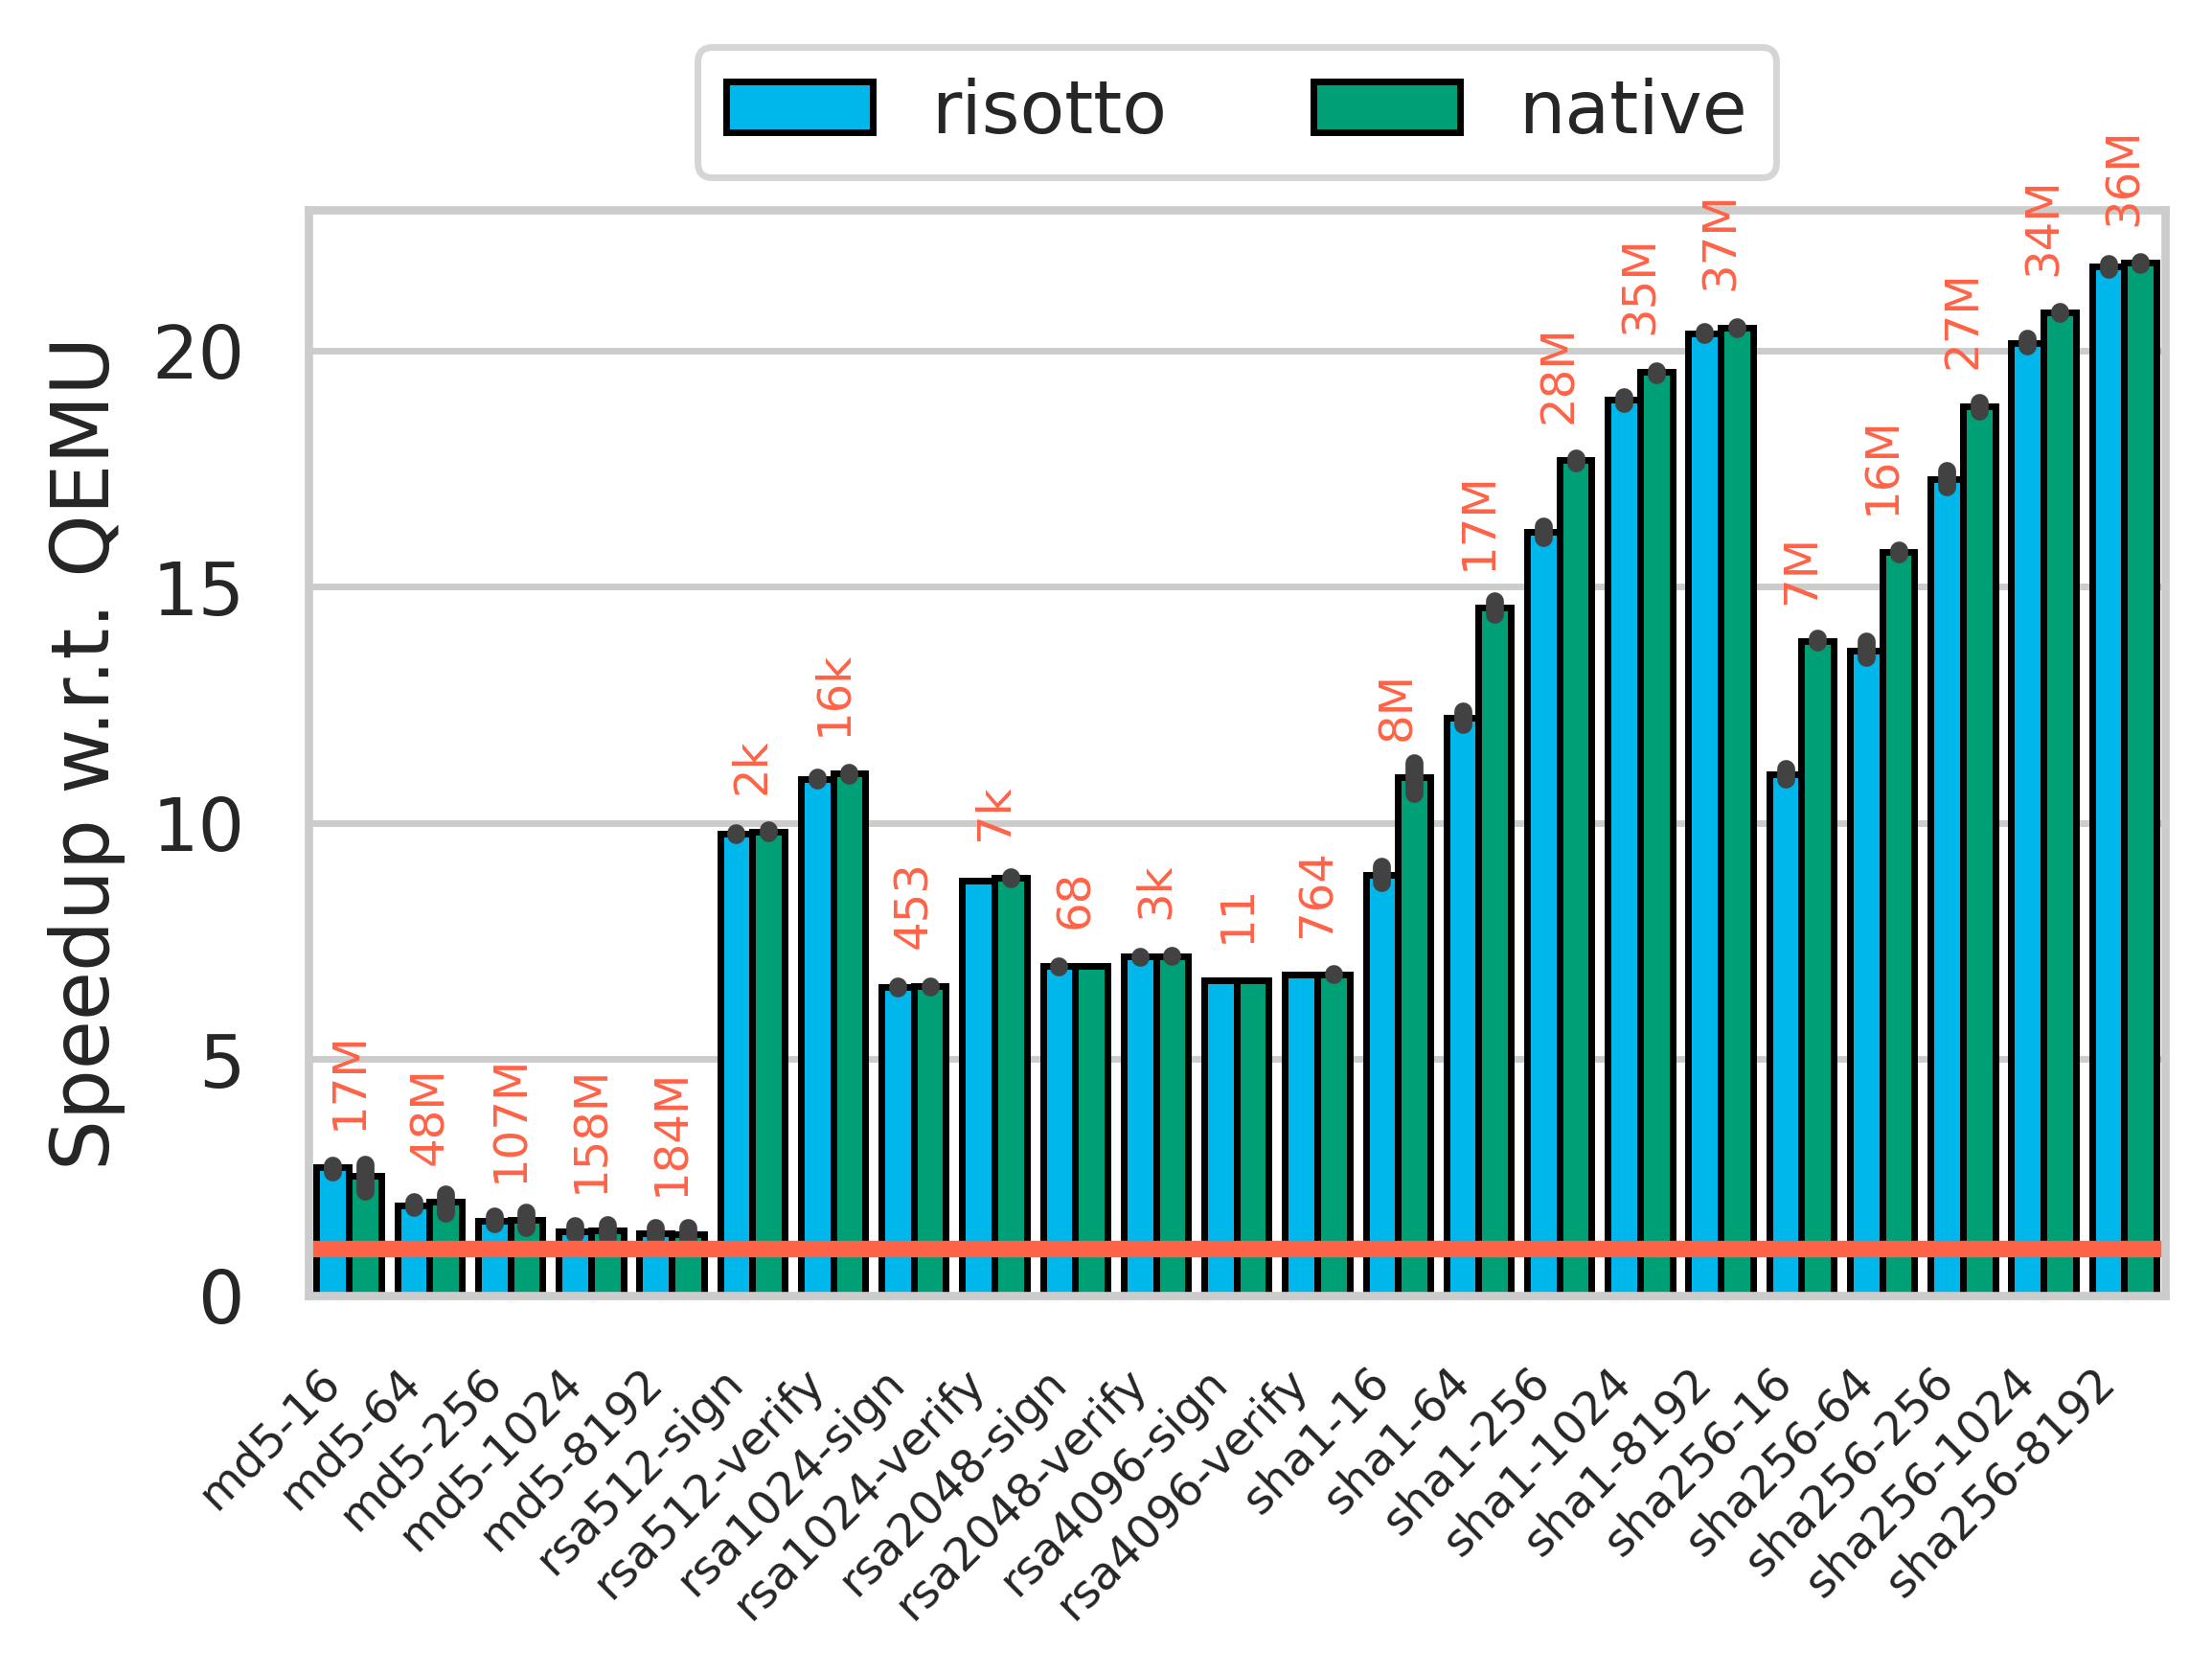

In [8]:
fig = plt.figure(figsize=(5,3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, x='bench', y='norm', hue='label',
                 hue_order=['risotto', 'native'], order=sorted_nicely(base_means))
plt.grid(visible=True, axis='y')
plt.xticks(ticks=range(0, len(base_means)), labels=[ l[8:] for l in sorted_nicely(base_means)], rotation=45, ha="right", fontsize='xx-small')
# remove openssl. from the x ticks
plt.xlabel("")
plt.ylabel("Speedup w.r.t. QEMU")
plt.axhline(y=1, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted_nicely(set(base_means))):
    if base_means[value] > 1000000:
        v = f"{base_means[value] / 1000000:.0f}M"
    elif base_means[value] > 1000:
        v = f"{base_means[value] / 1000:.0f}k"
    else:
        v = f"{base_means[value]:.0f}"
    tmp = max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]
    plt.text(idx, tmp+1, f"{v}", fontsize='xx-small', color='tomato', rotation=90, ha='center')
    #plt.text(idx, max(tmp+.3, 21), f"{v}", fontsize='xx-small', color='tomato', rotation=45, ha='center')
#plt.vlines(range(0, len(set(base_means))), ymin=0, ymax=20.8, linestyle='dashed', colors='grey', linewidth=.5, zorder=0)

# Set color + hatch
style = {
    'fill': [ True, True ],
    'color': [ palette['sky blue'], palette['bluish green'] ],
    'hatch': [ '', '', ''],
    'edgecolor': [ 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / int(len(base_means)))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), borderaxespad=0, ncol=2)

In [9]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [10]:
for i in sorted_nicely(base_means):
    print(f"{i:25}: {base_means[i]:>20.1f}")

openssl.md5-16           :           16587877.0
openssl.md5-64           :           48186748.0
openssl.md5-256          :          107277528.0
openssl.md5-1024         :          158121888.0
openssl.md5-8192         :          184318736.0
openssl.rsa512-sign      :               1512.2
openssl.rsa512-verify    :              15873.3
openssl.rsa1024-sign     :                452.8
openssl.rsa1024-verify   :               7429.3
openssl.rsa2048-sign     :                 67.8
openssl.rsa2048-verify   :               2702.4
openssl.rsa4096-sign     :                 10.9
openssl.rsa4096-verify   :                764.4
openssl.sha1-16          :            7636563.0
openssl.sha1-64          :           16674666.0
openssl.sha1-256         :           28208436.0
openssl.sha1-1024        :           34520296.0
openssl.sha1-8192        :           36906148.0
openssl.sha256-16        :            6852750.5
openssl.sha256-64        :           15559173.0
openssl.sha256-256       :           272

In [11]:
print(value)
max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]

openssl.sha256-8192


21.85801029689802

In [12]:
mean_df['risotto-speedup'] = mean_df['risotto'] / mean_df['qemu']
mean_df

,bench,qemu,native,risotto,risotto-speedup
0,openssl.md5-1024,1.581219e+08,2.168398e+08,2.156623e+08,1.363899
1,openssl.md5-16,1.658788e+07,4.209254e+07,4.499937e+07,2.712787
2,openssl.md5-256,1.072775e+08,1.722048e+08,1.688918e+08,1.574345
3,openssl.md5-64,4.818675e+07,9.532325e+07,9.214773e+07,1.912304
4,openssl.md5-8192,1.843187e+08,2.390591e+08,2.414837e+08,1.310142
5,openssl.rsa1024-sign,4.527947e+02,2.964844e+03,2.953614e+03,6.523075
6,openssl.rsa1024-verify,7.429325e+03,6.564845e+04,6.522416e+04,8.779285
7,openssl.rsa2048-sign,6.782713e+01,4.730531e+02,4.725325e+02,6.966719
8,openssl.rsa2048-verify,2.702407e+03,1.941161e+04,1.937184e+04,7.168363
9,openssl.rsa4096-sign,1.092283e+01,7.284913e+01,7.284000e+01,6.668604
